In [1]:
from sklearn.metrics import accuracy_score,confusion_matrix
from Inference.Facenet import Facenet
import matplotlib.pyplot as plt
from imutils import paths
from os.path import sep
import seaborn as sns
import cv2

2022-06-21 21:30:51.713771: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 21:30:51.713795: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load ảnh test

In [2]:
image_paths = list(paths.list_images("./Dataset/Test"))
person_img = []
person_name = []
for ip in image_paths:
    image = cv2.imread(ip)
    person_img.append(image)
    # Split bằng "/" rồi lấy tên thư mục (-1 là tên file ảnh)
    lbl = ip.split(sep)[-2]
    person_name.append(lbl)
len(person_img), len(person_name)

(63, 63)

Nhận diện

In [3]:
fn = Facenet()
person_predict = []
for pi in person_img:
    identity, _, _, _ = fn.Get_People_Identity_SVM(pi)[0]
    person_predict.append(identity)

2022-06-21 21:30:59.116408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/phuocleoceo/.local/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-21 21:30:59.116446: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-21 21:30:59.116474: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PLCLaptop): /proc/driver/nvidia/version does not exist
2022-06-21 21:30:59.116808: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/phuocleoceo/.local/

Đánh giá

In [4]:
person_predict_acc = accuracy_score(person_name,person_predict)*100
print(f">> Accuracy : {person_predict_acc} (%)")

>> Accuracy : 95.23809523809523 (%)


Text(69.0, 0.5, 'True label')

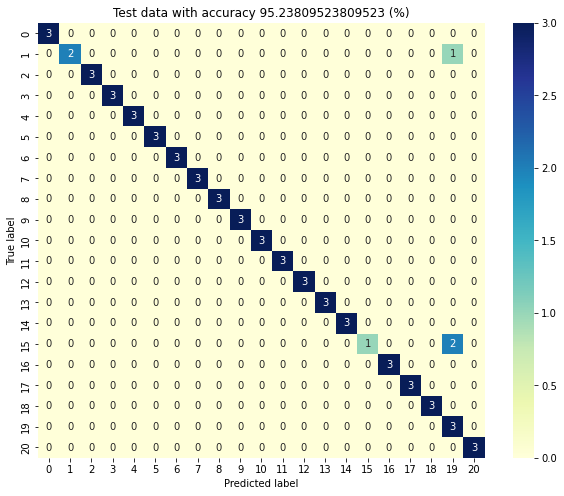

In [5]:
plt.figure(figsize=(10, 8))
plt.title(f"Test data with accuracy {person_predict_acc} (%)")
sns.heatmap(confusion_matrix(person_name, person_predict), cmap="YlGnBu", annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [6]:
print(person_name)
print("-----------------------")
print(person_predict)

['Hoang', 'Hoang', 'Hoang', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'Thanh', 'Thanh', 'Thanh', 'Hung', 'Hung', 'Hung', 'CaoTri', 'CaoTri', 'CaoTri', 'Yen', 'Yen', 'Yen', 'DucTruong', 'DucTruong', 'DucTruong', 'NamNhi', 'NamNhi', 'NamNhi', 'DucBear', 'DucBear', 'DucBear', 'NhuTri', 'NhuTri', 'NhuTri', 'Duy', 'Duy', 'Duy', 'Huan', 'Huan', 'Huan', 'Ngan', 'Ngan', 'Ngan', 'Ta', 'Ta', 'Ta', 'Phuoc', 'Phuoc', 'Phuoc', 'Quy', 'Quy', 'Quy', 'Quan', 'Quan', 'Quan', 'Thinh', 'Thinh', 'Thinh', 'KhanhLinh', 'KhanhLinh', 'KhanhLinh', 'QuynhAnh', 'QuynhAnh', 'QuynhAnh', 'Bon', 'Bon', 'Bon']
-----------------------
['Hoang', 'Hoang', 'Hoang', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'Thanh', 'Thanh', 'Thanh', 'Hung', 'Hung', 'Hung', 'CaoTri', 'UNKNOWN', 'CaoTri', 'Yen', 'Yen', 'Yen', 'DucTruong', 'DucTruong', 'DucTruong', 'NamNhi', 'NamNhi', 'NamNhi', 'DucBear', 'DucBear', 'DucBear', 'NhuTri', 'NhuTri', 'NhuTri', 'Duy', 'Duy', 'Duy', 'Huan', 'Huan', 'Huan', 'Ngan', 'Ngan', 'Ngan', 'Ta', 'Ta', 'Ta', 'Phuoc', 'Phuoc'